In [2]:
# Calling the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## 1. Business Problem

It is desired to develop a machine learning model that can predict customers who will leave the company. It is expected that the necessary data analysis and feature engineering steps will be carried out before developing the model.

## 2. Dataset Story

Telco customer churn data pertains to a fictitious telecommunication company that provides home phone and internet services to 7043 customers in California. The dataset encompasses information regarding customers who have either discontinued, retained or newly subscribed to the services.

## 3. Features

+ CustomerId - Unique identifier for each customer account
+ Gender - Customer's gender
+ SeniorCitizen - Binary indicator for senior citizen status (1 for yes, 0 for no)
+ Partner - Presence of a partner (Yes or No)
+ Dependents - Presence of dependents (Yes or No)
+ Tenure - Duration of the customer's association with the company (in months)
+ PhoneService - Phone service subscription (Yes or No)
+ MultipleLines - Presence of multiple lines (Yes, No, or No phone service)
+ InternetService - Type of internet service provider (DSL, Fiber optic, or No)
+ OnlineSecurity - Presence of online security (Yes, No, or No internet service)
+ OnlineBackup - Presence of online backup (Yes, No, or No internet service)
+ DeviceProtection - Presence of device protection (Yes, No, or No internet service)
+ TechSupport - Technical support subscription (Yes, No, or No internet service)
+ StreamingTV - Streaming TV subscription (Yes, No, or No internet service)
+ StreamingMovies - Streaming movies subscription (Yes, No, or No internet service)
+ Contract - Duration of the customer's contract (Month-to-month, One year, Two year)
+ PaperlessBilling - Paperless billing preference (Yes or No)
+ PaymentMethod - Payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
+ MonthlyCharges - Monthly billed amount
+ TotalCharges - Cumulative billed amount
+ Churn - Churn status, indicating if the customer terminated services (Yes or No)

## 4. Tasks

In [3]:
# Load the dataset
df = pd.read_csv("datasets/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###  4.1 Exploratory Data Analysis(EDA)

In [4]:

def check_df(dataframe, head=5):
    print("######## Shape ########")
    print(dataframe.shape)
    print("######## Types ########")
    print(dataframe.dtypes)
    print("######## Head ########")
    print(dataframe.head())
    print("######## Tail ########")
    print((dataframe.tail()))
    print("######## NA ########")
    print(dataframe.isnull().sum())
    print("######## Quantiles ########")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


check_df(df)

######## Shape ########
(7043, 21)
######## Types ########
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
######## Head ########
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# We converted the Total Charges variable to a numerical variable.

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
# Capture numerical and categorical variables.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

     It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
     Note: Categorical variables with numerical appearance are also included.

    Parameters
    ------
        dataframe: dataframe
                Dataframe from which variable names are to be taken
        cat_th: int, optional
                Class threshold value for variables that are numeric but categorical
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numerical variable list
        cat_but_car: list
                List of cardinal variables with categorical view

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        inside num_but_cat cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [8]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [9]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [10]:
cat_but_car

['customerID']

In [11]:
# Since the churn variable consists of Yes-No, we converted it to 1-0

df["Churn"].value_counts()
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [12]:
# Analyze numerical and categorical variables.

In [13]:
###################################
# ANALYSIS OF CATEGORICAL VARIABLES
###################################

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
          "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435
################


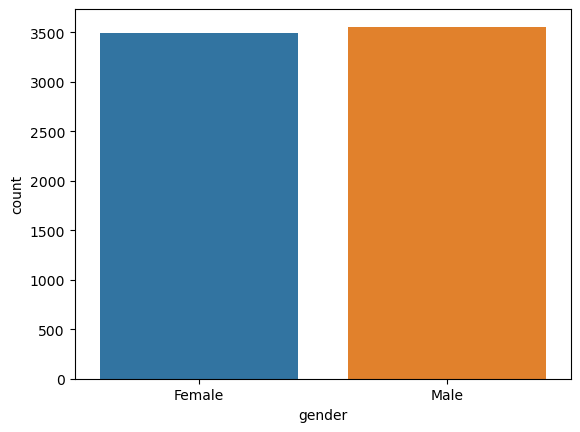

         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328
################


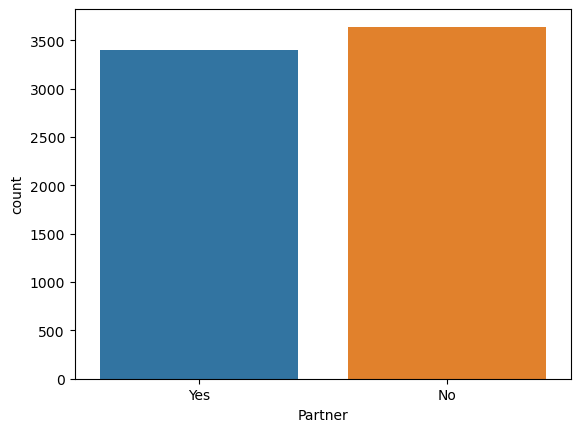

            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824
################


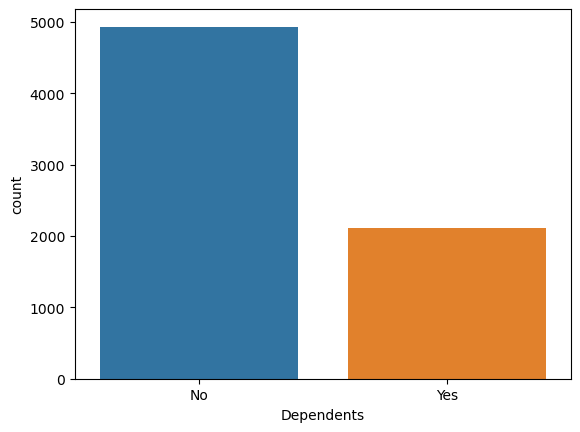

              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374
################


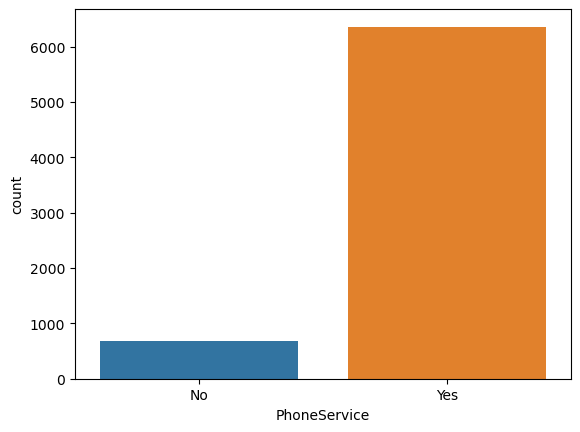

                  MultipleLines      Ratio
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
################


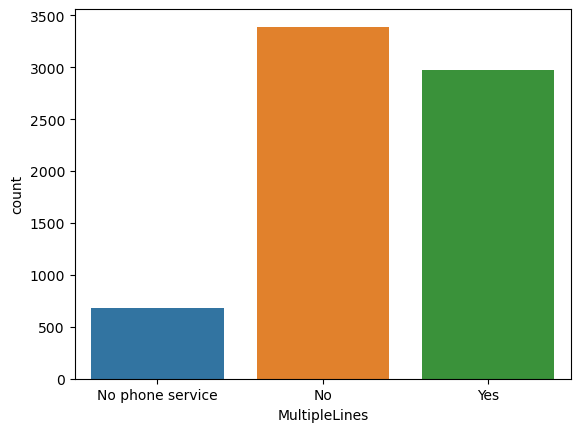

                 InternetService      Ratio
InternetService                            
Fiber optic                 3096  43.958540
DSL                         2421  34.374556
No                          1526  21.666903
################


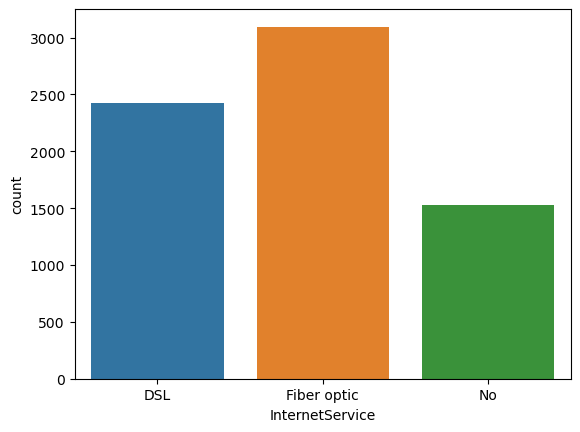

                     OnlineSecurity      Ratio
OnlineSecurity                                
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903
################


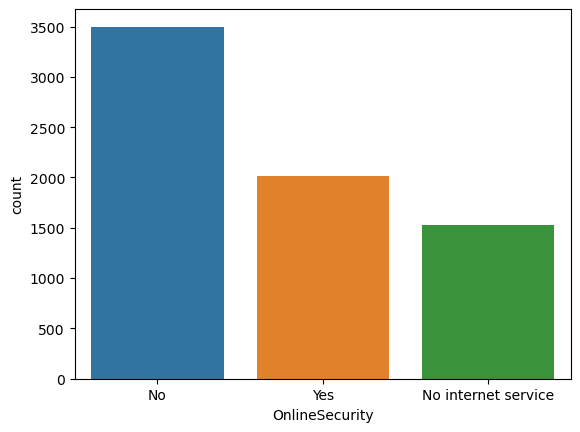

                     OnlineBackup      Ratio
OnlineBackup                                
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903
################


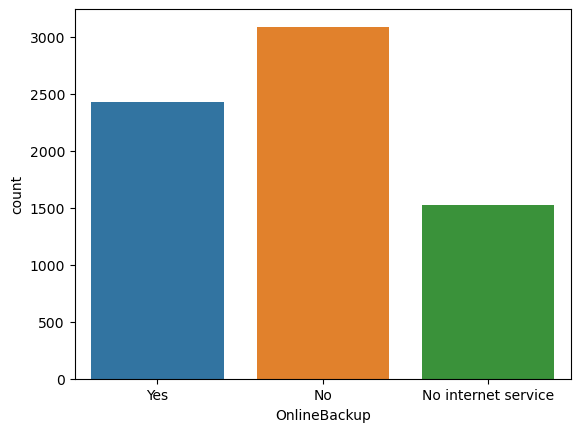

                     DeviceProtection      Ratio
DeviceProtection                                
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903
################


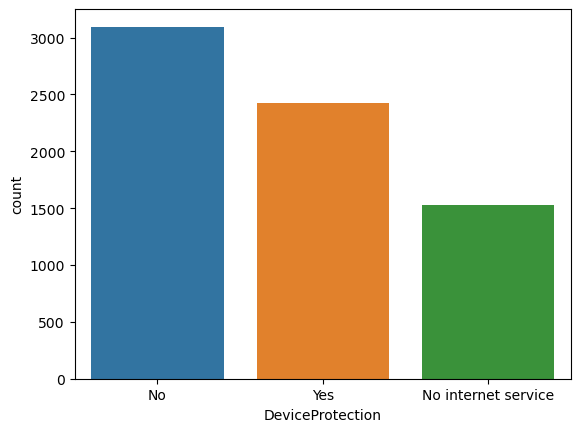

                     TechSupport      Ratio
TechSupport                                
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903
################


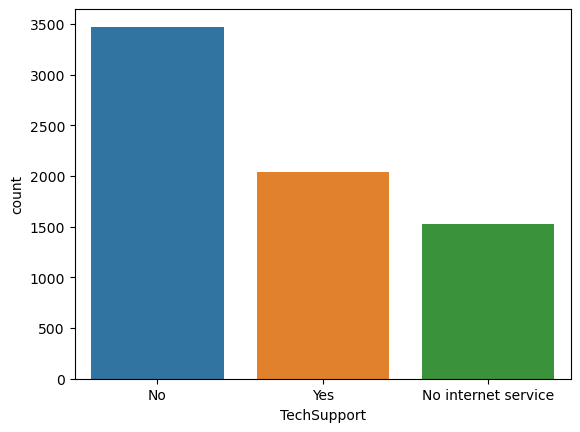

                     StreamingTV      Ratio
StreamingTV                                
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903
################


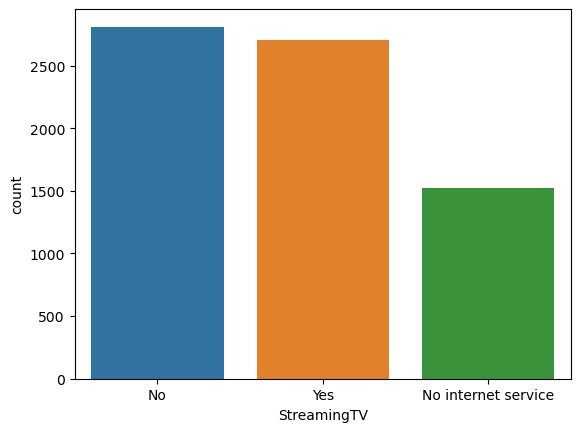

                     StreamingMovies      Ratio
StreamingMovies                                
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903
################


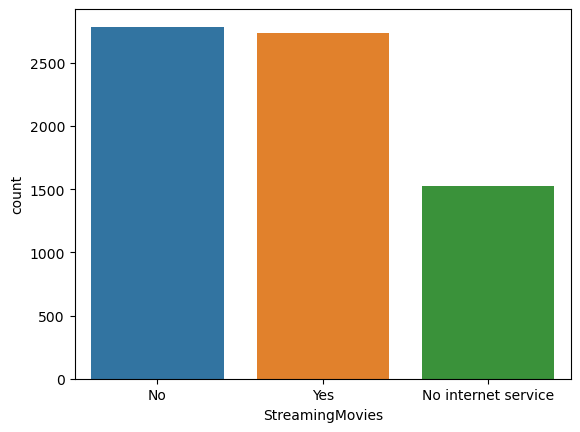

                Contract      Ratio
Contract                           
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383
################


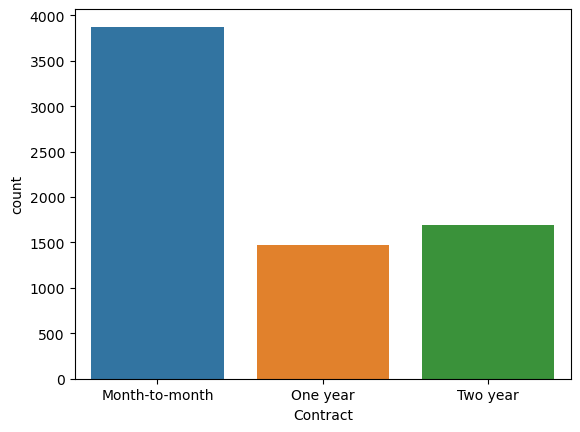

                  PaperlessBilling      Ratio
PaperlessBilling                             
Yes                           4171  59.221922
No                            2872  40.778078
################


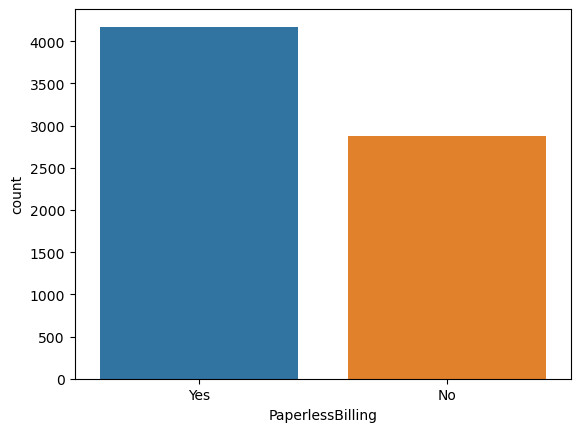

                           PaymentMethod      Ratio
PaymentMethod                                      
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109
################


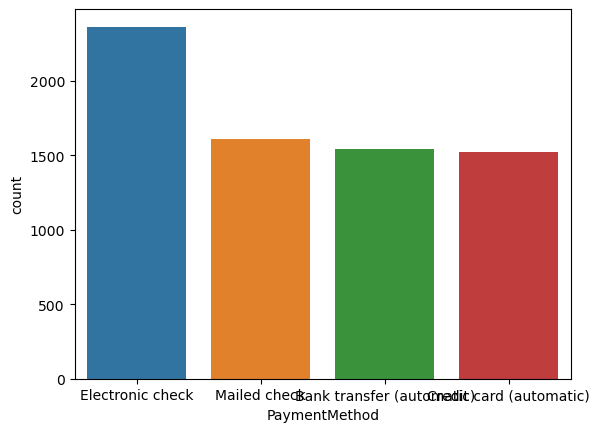

       Churn      Ratio
Churn                  
0       5174  73.463013
1       1869  26.536987
################


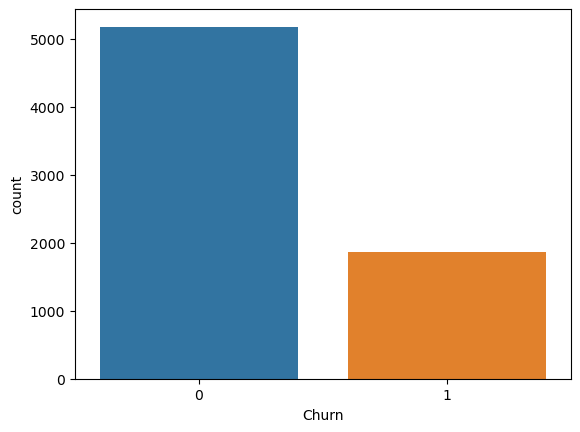

               SeniorCitizen      Ratio
SeniorCitizen                          
0                       5901  83.785319
1                       1142  16.214681
################


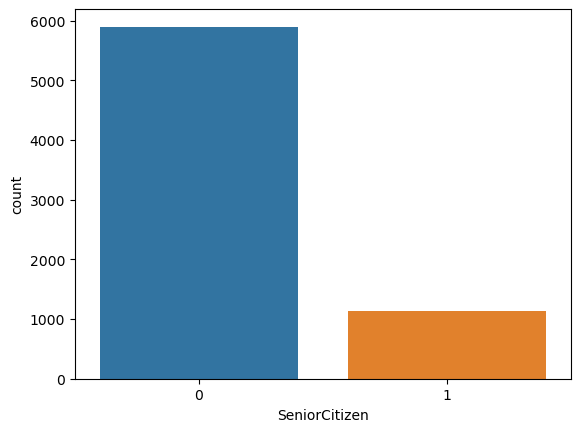

In [14]:
for col in cat_cols:
    cat_summary(df, col, True)

In [15]:
###################################
# ANALYSIS OF NUMERICAL VARIABLES
##################################

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


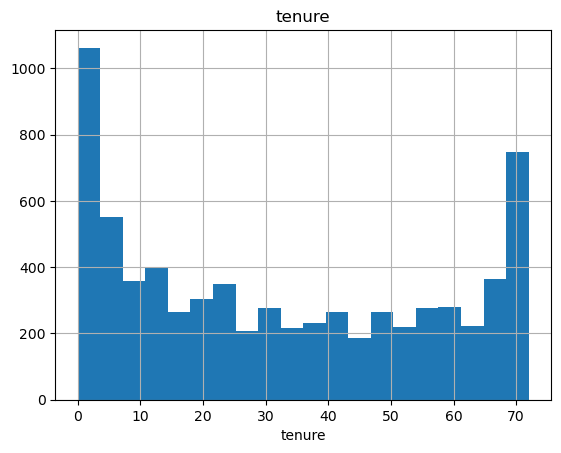

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


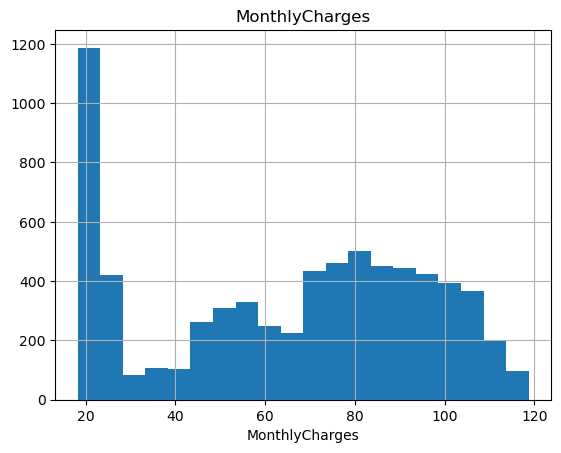

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


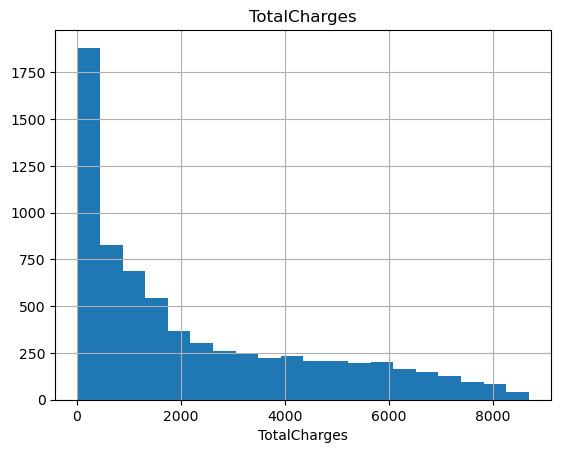

In [16]:
for col in num_cols:
    num_summary(df, col, True)

In [17]:
# Target variable analysis with graphs

def target_summary_with_cat(dataframe, target, col_name):
    print(pd.DataFrame({"Taget Mean": dataframe.groupby(col_name)[target].mean()}))
for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

        Taget Mean
gender            
Female    0.269209
Male      0.261603
         Taget Mean
Partner            
No         0.329580
Yes        0.196649
            Taget Mean
Dependents            
No            0.312791
Yes           0.154502
              Taget Mean
PhoneService            
No              0.249267
Yes             0.267096
                  Taget Mean
MultipleLines               
No                  0.250442
No phone service    0.249267
Yes                 0.286099
                 Taget Mean
InternetService            
DSL                0.189591
Fiber optic        0.418928
No                 0.074050
                     Taget Mean
OnlineSecurity                 
No                     0.417667
No internet service    0.074050
Yes                    0.146112
                     Taget Mean
OnlineBackup                   
No                     0.399288
No internet service    0.074050
Yes                    0.215315
                     Taget Mean
DeviceProtectio

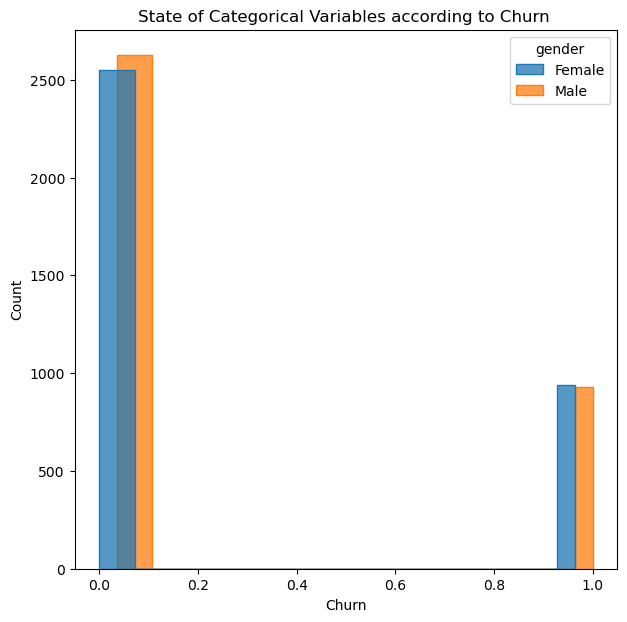

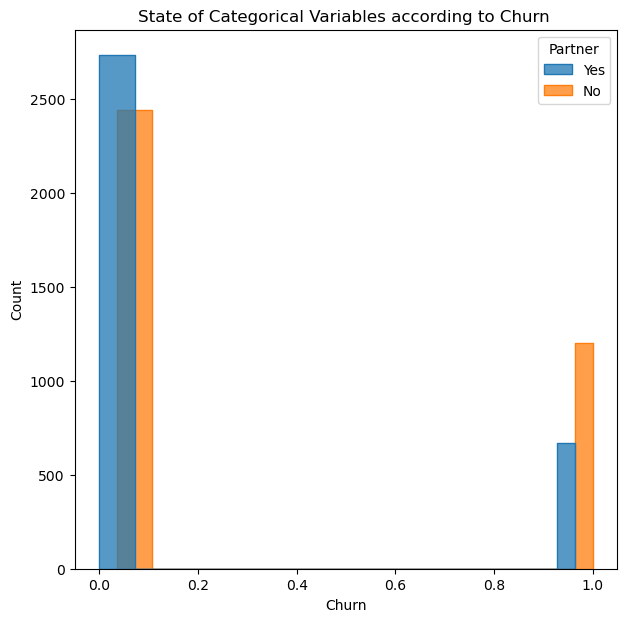

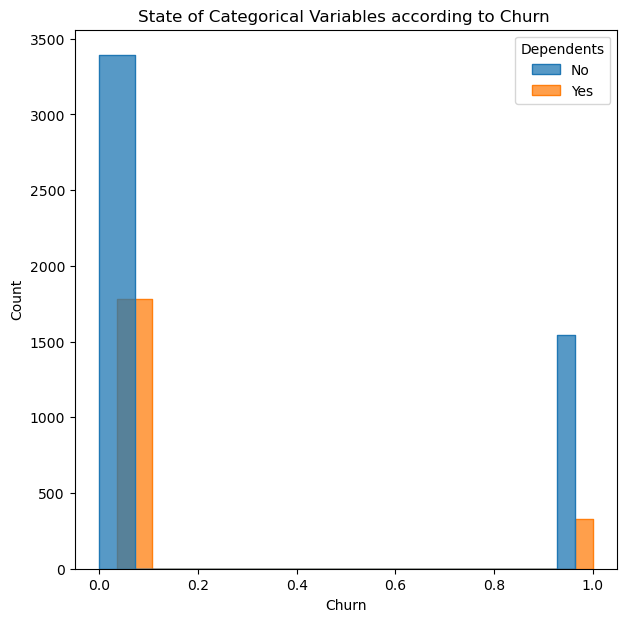

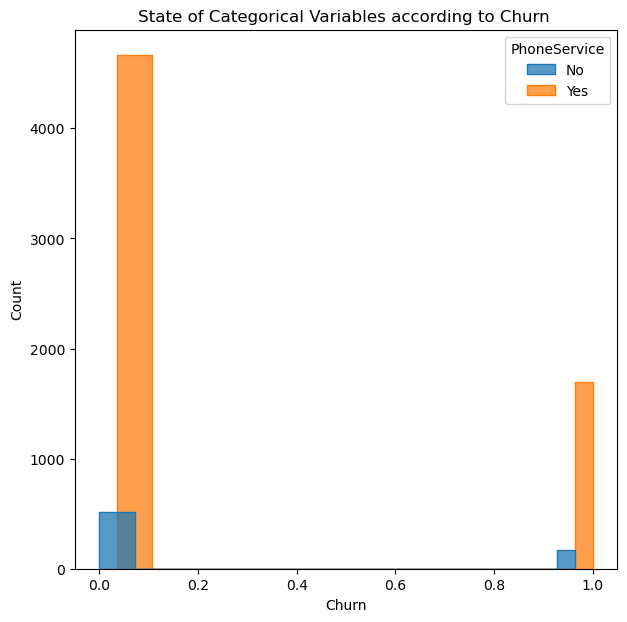

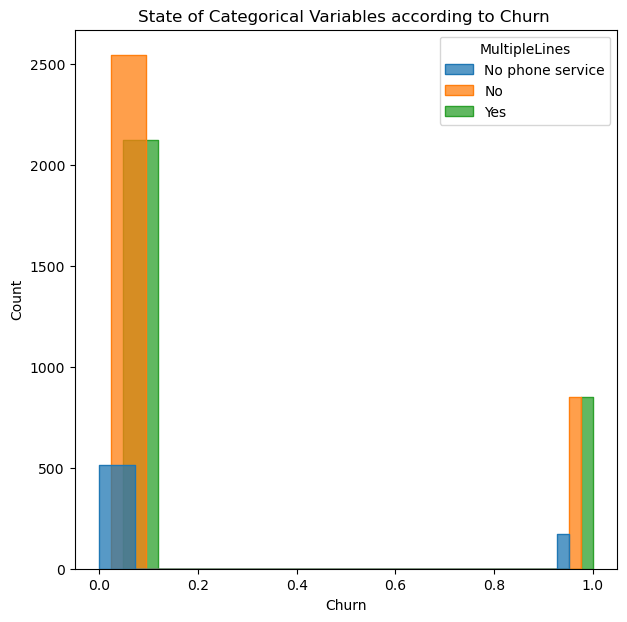

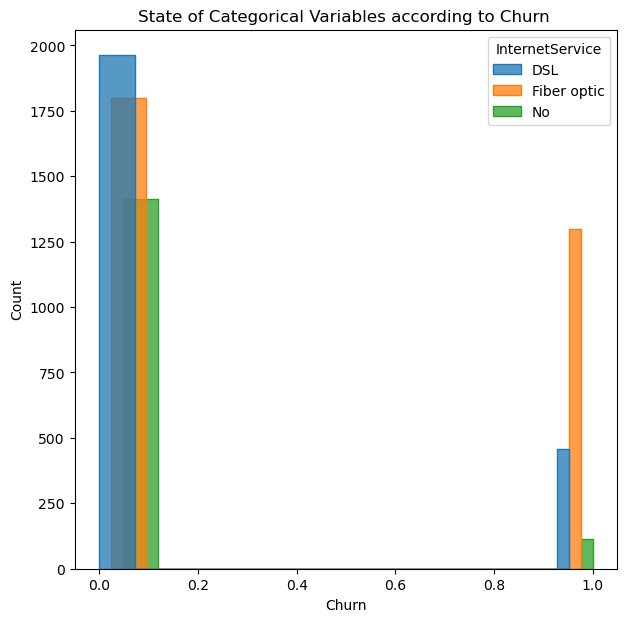

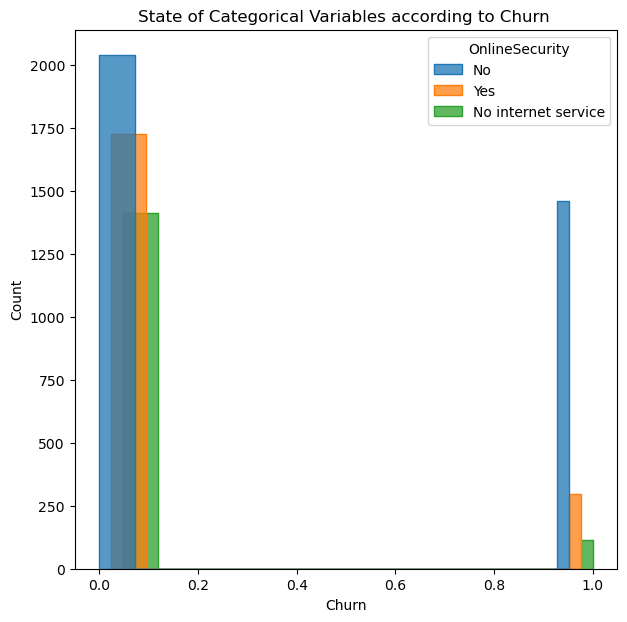

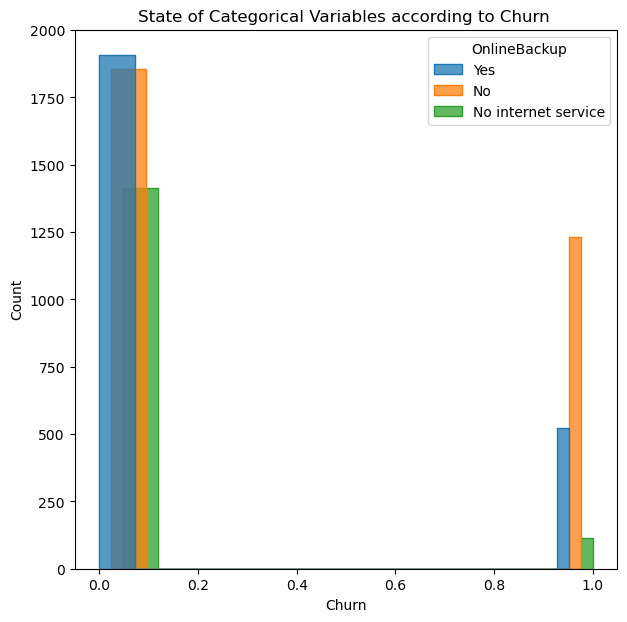

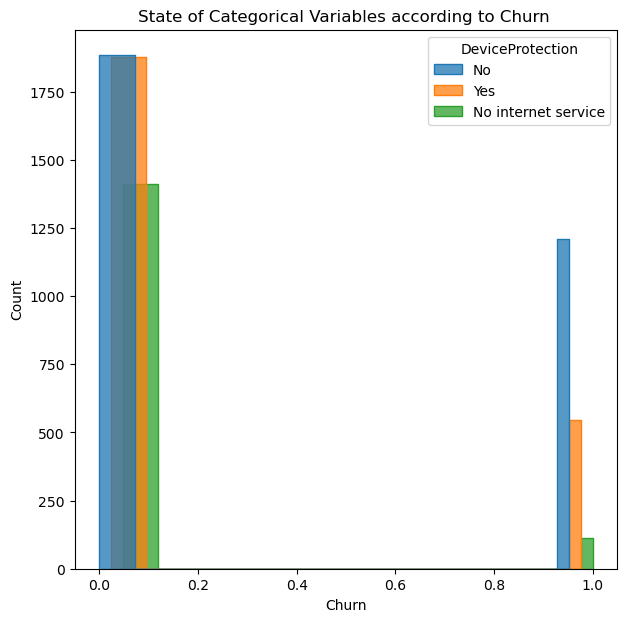

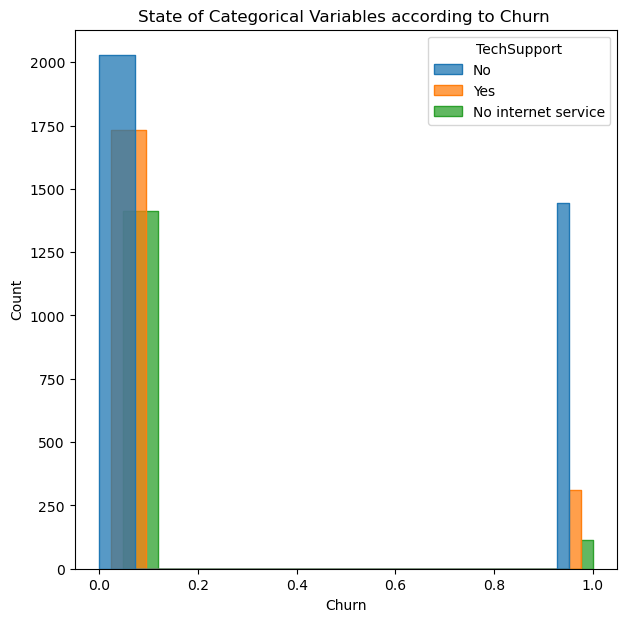

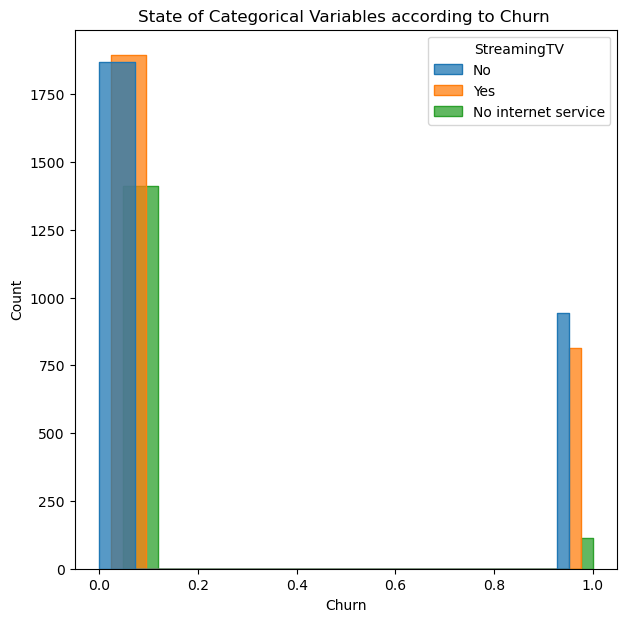

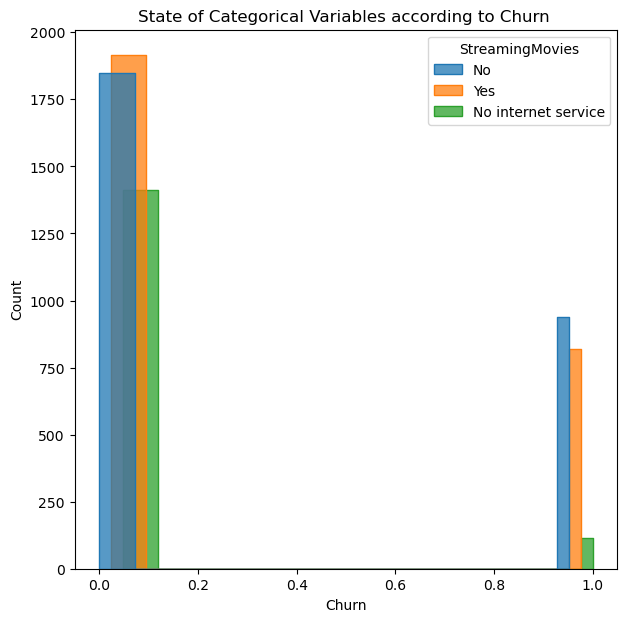

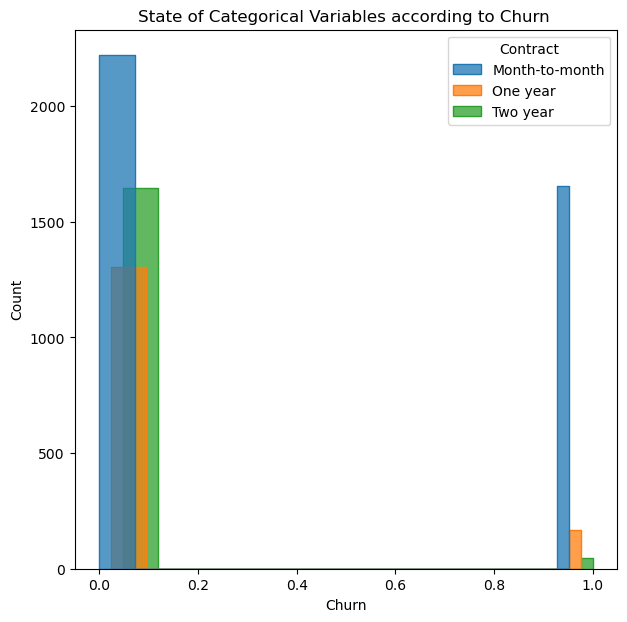

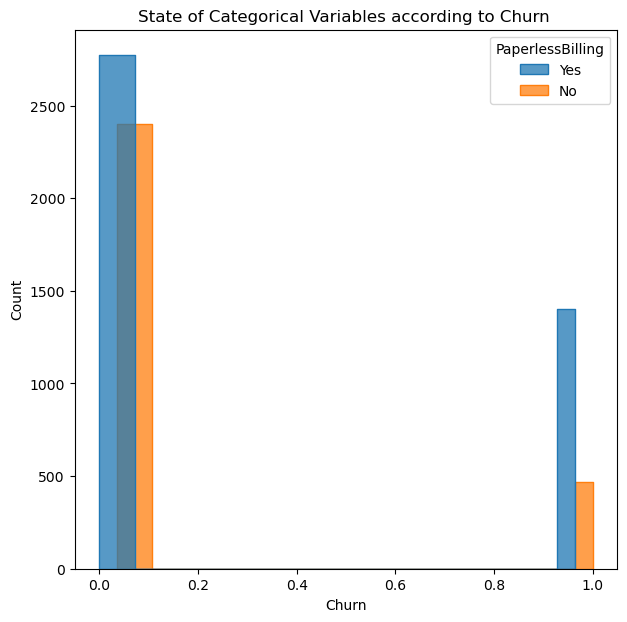

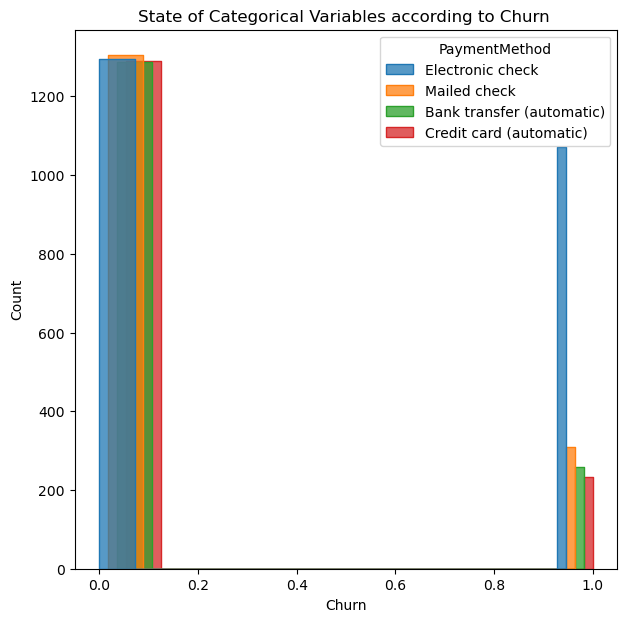

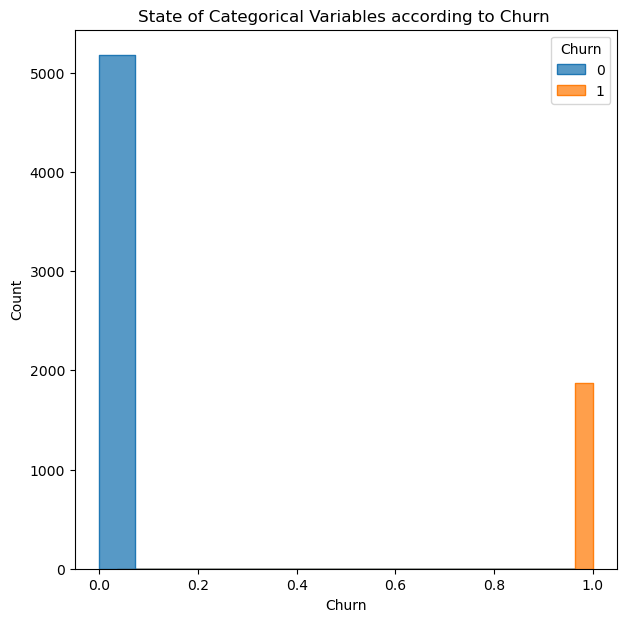

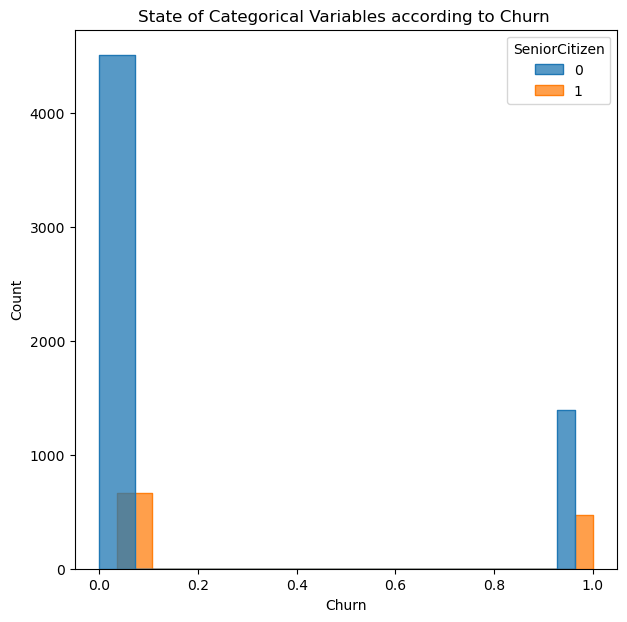

In [18]:
# Target variable analysis with graphs
def target_vs_category_visual(dataframe, target, col_name):
    plt.figure(figsize=(7,7))
    sns.histplot(x=target, hue=col_name, data=dataframe, element="step", multiple="dodge")
    plt.title("State of Categorical Variables according to Churn ")
    plt.show(block=True)


for col in cat_cols:
    target_vs_category_visual(df,"Churn", col)

In [19]:
# Target variable analysis according to numerical variables
def target_summary_with_num(dataframe, target, numeric_col):
    print(dataframe.groupby(target).agg({numeric_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df, "Churn", col)

          tenure
Churn           
0      37.569965
1      17.979133


       MonthlyCharges
Churn                
0           61.265124
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094




##### 4.1.1 The Missing Values Analysis

In [20]:
def missin_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


missin_values_table(df, True)

              n_miss  ratio
TotalCharges      11   0.16


['TotalCharges']

In [20]:
# Filling in missing data with median

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

##### 4.1.2 Outliers Analysis

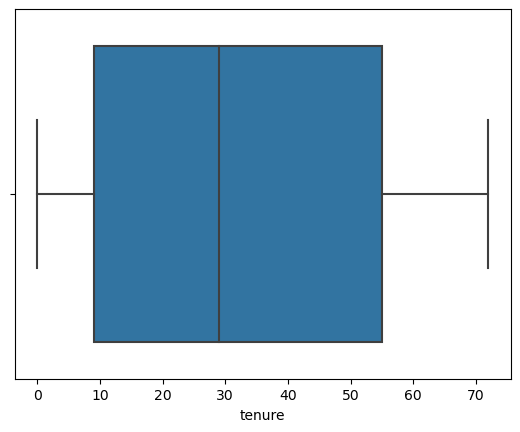

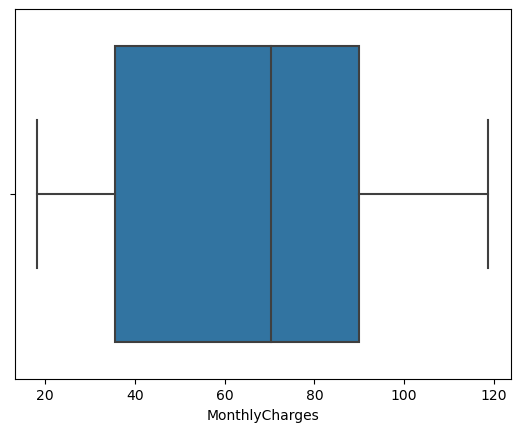

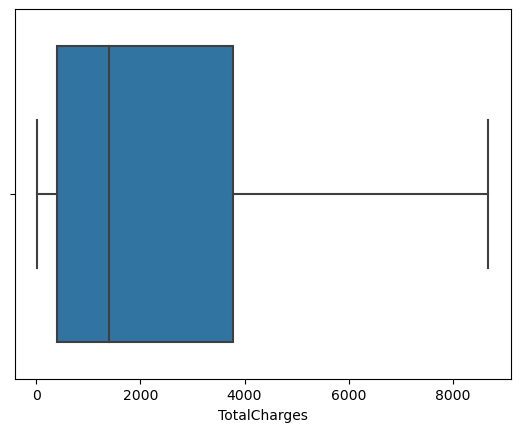

In [21]:
# If we examine the outliers graphically;
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.show(block=True)

In [22]:
# Conduct an outlier observation analysis.
## First, the threshold value (threshold), upper and lower limits are determined.

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [23]:
## Then we questioned whether there were any outliers

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [24]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


##### 4.1.3 Correlation Analysis

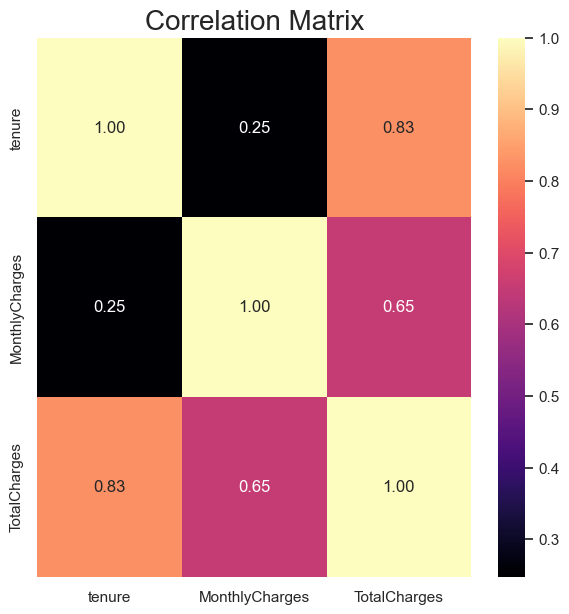

In [183]:
df[num_cols].corr()
f, ax = plt.subplots(figsize=[7,7])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

### 4.2 Feature Engineering

###### 4.2.1 Create new variables

In [184]:
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Female" else 0)

In [185]:
# A new variable was created based on gender and whether the customer is elderly or not.

df.loc[(df["gender"] == 0) & (df["SeniorCitizen"] == 0), "NEW_GEN_SEN"] = "youngmale"
df.loc[(df["gender"] == 0) & (df["SeniorCitizen"] == 1), "NEW_GEN_SEN"] = "seniormale"

df.loc[(df["gender"] == 1) & (df["SeniorCitizen"] == 0), "NEW_GEN_SEN"] = "youngfemale"
df.loc[(df["gender"] == 1) & (df["SeniorCitizen"] == 1), "NEW_GEN_SEN"] = "seniorfemale"

df.groupby("NEW_GEN_SEN").agg({"Churn": ["mean", "count"]})

Churn      
                  mean count
NEW_GEN_SEN                 
seniorfemale  0.422535   568
seniormale    0.411150   574
youngfemale   0.239384  2920
youngmale     0.232808  2981

In [186]:
# Creating a categorical variable based on the number of months the customer stays

df.loc[(df['tenure'] < 9), 'NEW_TENURE'] = "New_Customer"
df.loc[(df['tenure'] >= 9) & (df['tenure'] < 29), 'NEW_TENURE'] = "Potential_Loyalists"
df.loc[(df['tenure'] >= 29) & (df['tenure'] < 55), 'NEW_TENURE'] = "Loyal_Customer"
df.loc[(df['tenure'] >= 55), 'NEW_TENURE'] = "Permanent_customer"

df.groupby("NEW_TENURE").agg({"Churn": ["mean", "count"]})

Churn      
                         mean count
NEW_TENURE                         
Loyal_Customer       0.191083  1727
New_Customer         0.505476  1735
Permanent_customer   0.079714  1819
Potential_Loyalists  0.293417  1762

In [187]:
# Does the person make automatic payments?

df["NEW_AUTO_PAYMENT"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)",
                                                                            "Credit card (automatic)"] else 0)

df.groupby("NEW_AUTO_PAYMENT").agg({"Churn": ["mean", "count"]})

Churn      
                      mean count
NEW_AUTO_PAYMENT                
0                 0.346744  3977
1                 0.159817  3066

In [188]:
# Segment by monthly amount collected from the customer

df['SEGMENT'] = pd.qcut(df['MonthlyCharges'], 3, labels=['Economy', 'Standard', 'Premium'])

df.groupby("SEGMENT").agg({"Churn": ["mean", "count"]})

Churn      
              mean count
SEGMENT                 
Economy   0.158656  2351
Standard  0.296802  2345
Premium   0.340861  2347

In [189]:
# Creating new changes depending on whether you have a partner or not and according to your gender

df.loc[((df['gender'] == 0) & (df["Partner"] == "Yes")), 'NEW_GEN_PART'] = "partner_male"
df.loc[((df['gender'] == 0) & (df["Partner"] == "No")), 'NEW_GEN_PART'] = "nonpartner_male"
df.loc[((df['gender'] == 1) & (df["Partner"] == "Yes")), 'NEW_GEN_PART'] = "partner_female"
df.loc[((df['gender'] == 1) & (df["Partner"] == "No")), 'NEW_GEN_PART'] = "nonpartner_female"

In [190]:
# People who receive any streaming service

df["NEW_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes")
                                                       or (x["StreamingMovies"] == "Yes") else 0, axis=1)

In [191]:
# Customers average monthly payment

df["NEW_CHARGES"] = df["TotalCharges"] / (df["tenure"] + 1)

In [192]:
# Since we added new variables, grab_col_names is called again
cat_cols,num_cols,cat_but_car = grab_col_names(df, car_th=26)

Observations: 7043
Variables: 28
cat_cols: 23
num_cols: 4
cat_but_car: 1
num_but_cat: 6


###### 4.2.2 Encoding Operations

In [193]:
# Label Encoder

def label_encoder(dataframe, binary_col):
    label_encoder = LabelEncoder()
    dataframe[binary_col] = label_encoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_col = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]


for col in binary_col:
    label_encoder(df, col)

In [194]:
# One-hot Encoder

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return dataframe


ohe_cols = [col for col in cat_cols if col not in binary_col and col not in ["Churn"]]

df = one_hot_encoder(df, ohe_cols)

##### 4.2.3 Standardize for numeric variables

In [195]:
ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])

### 4.3 Modelling

In [196]:
y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=17)

In [198]:
# Random Forest
#########################

rf_model = RandomForestClassifier(random_state=46).fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [199]:
rf_results = {'Accuracy':  accuracy_score(y_test, y_pred),
              'Precision': precision_score(y_test, y_pred),
              'Recall':    recall_score(y_test, y_pred),
              'F1 Score':  f1_score(y_test, y_pred),
              'ROC-AUC':   roc_auc_score(y_test, y_pred)
              }

In [200]:
rf_results = pd.Series(rf_results)
rf_results = rf_results.rename("Random Forest")
rf_results

Accuracy     0.782825
Precision    0.629893
Recall       0.467018
F1 Score     0.536364
ROC-AUC      0.683024
Name: Random Forest, dtype: float64

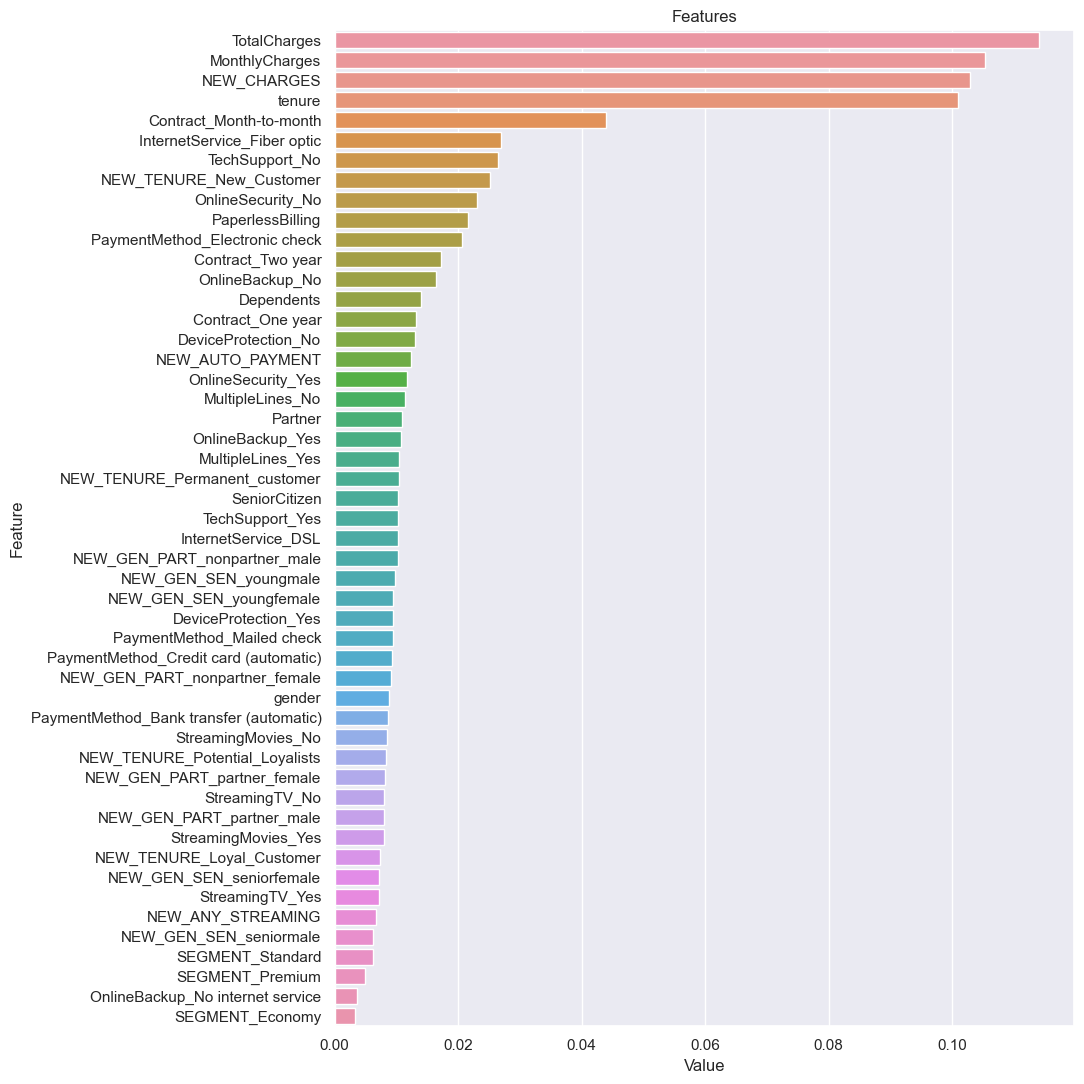

In [211]:
# Feature Importance

def plot_importance(model, features, num=50, save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(11,11))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show(block = True)
    if save:
        plt.savefig("importances.png")



plot_importance(rf_model, X_test)

In [203]:
# Logistic Regression
#########################

log_model = LogisticRegression(max_iter=1000).fit(X_train,y_train)
y_pred = log_model.predict(X_test)

In [204]:
log_results = {'Accuracy':  accuracy_score(y_test, y_pred),
              'Precision': precision_score(y_test, y_pred),
              'Recall':    recall_score(y_test, y_pred),
              'F1 Score':  f1_score(y_test, y_pred),
              'ROC-AUC':   roc_auc_score(y_test, y_pred)}

In [107]:
log_results = pd.Series(log_results)
log_results = log_results.rename("Logistic Regression")
log_results

Accuracy     0.806246
Precision    0.681507
Recall       0.525066
F1 Score     0.593145
ROC-AUC      0.717387
Name: Logistic Regression, dtype: float64

In [108]:
# KNN
#########################

knn_model = KNeighborsClassifier().fit(X_train, y_train)
X_test = X_test.values

y_pred = knn_model.predict(X_test)

C:\Users\tzcnm\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [109]:
knn_results = {'Accuracy':  accuracy_score(y_test, y_pred),
              'Precision': precision_score(y_test, y_pred),
              'Recall':    recall_score(y_test, y_pred),
              'F1 Score':  f1_score(y_test, y_pred),
              'ROC-AUC':   roc_auc_score(y_test, y_pred)}

knn_results = pd.Series(knn_results)
knn_results = knn_results.rename("KNeighbors Classifier")
knn_results

Accuracy     0.760114
Precision    0.560831
Recall       0.498681
F1 Score     0.527933
ROC-AUC      0.677496
Name: KNeighbors Classifier, dtype: float64

In [206]:
# LightGBM
#########################

lgbm_model = LGBMClassifier(verbose=-1).fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

In [207]:
lgbm_results = {'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
                'ROC-AUC': roc_auc_score(y_test, y_pred)}

lgbm_results = pd.Series(lgbm_results)
lgbm_results = lgbm_results.rename("LightGBM")
lgbm_results

Accuracy     0.791341
Precision    0.638436
Recall       0.517150
F1 Score     0.571429
ROC-AUC      0.704692
Name: LightGBM, dtype: float64

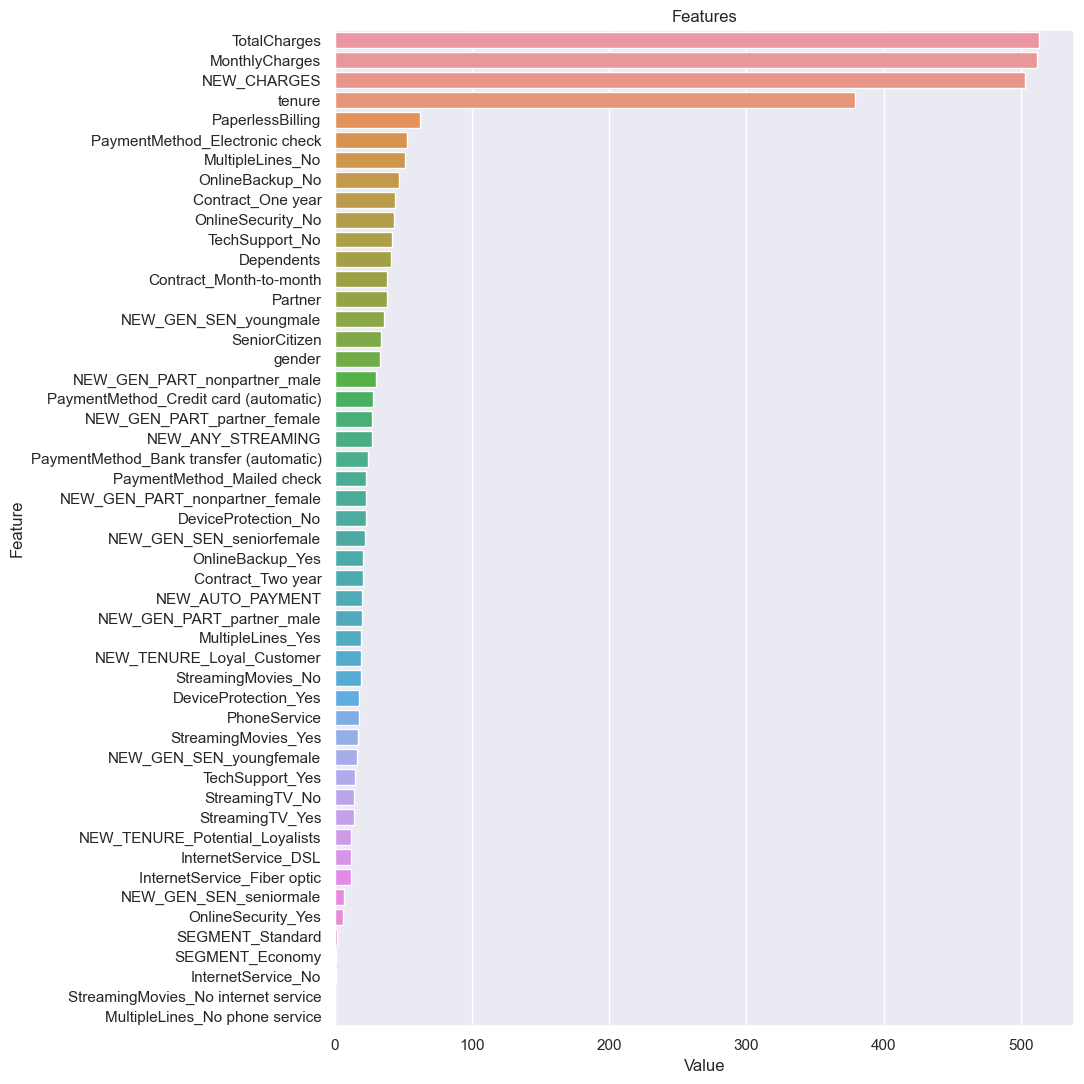

In [210]:
# Feature Importance

def plot_importance(model, features, num=50, save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(11,11))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show(block = True)
    if save:
        plt.savefig("importances.png")



plot_importance(lgbm_model, X_test)

In [113]:
# CART
#########################

cart_model = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = cart_model.predict(X_test)

C:\Users\tzcnm\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [114]:
cart_results = {'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
                'ROC-AUC': roc_auc_score(y_test, y_pred)}

cart_results = pd.Series(cart_results)
cart_results = cart_results.rename("CART")
cart_results

Accuracy     0.729595
Precision    0.497462
Recall       0.517150
F1 Score     0.507115
ROC-AUC      0.662459
Name: CART, dtype: float64

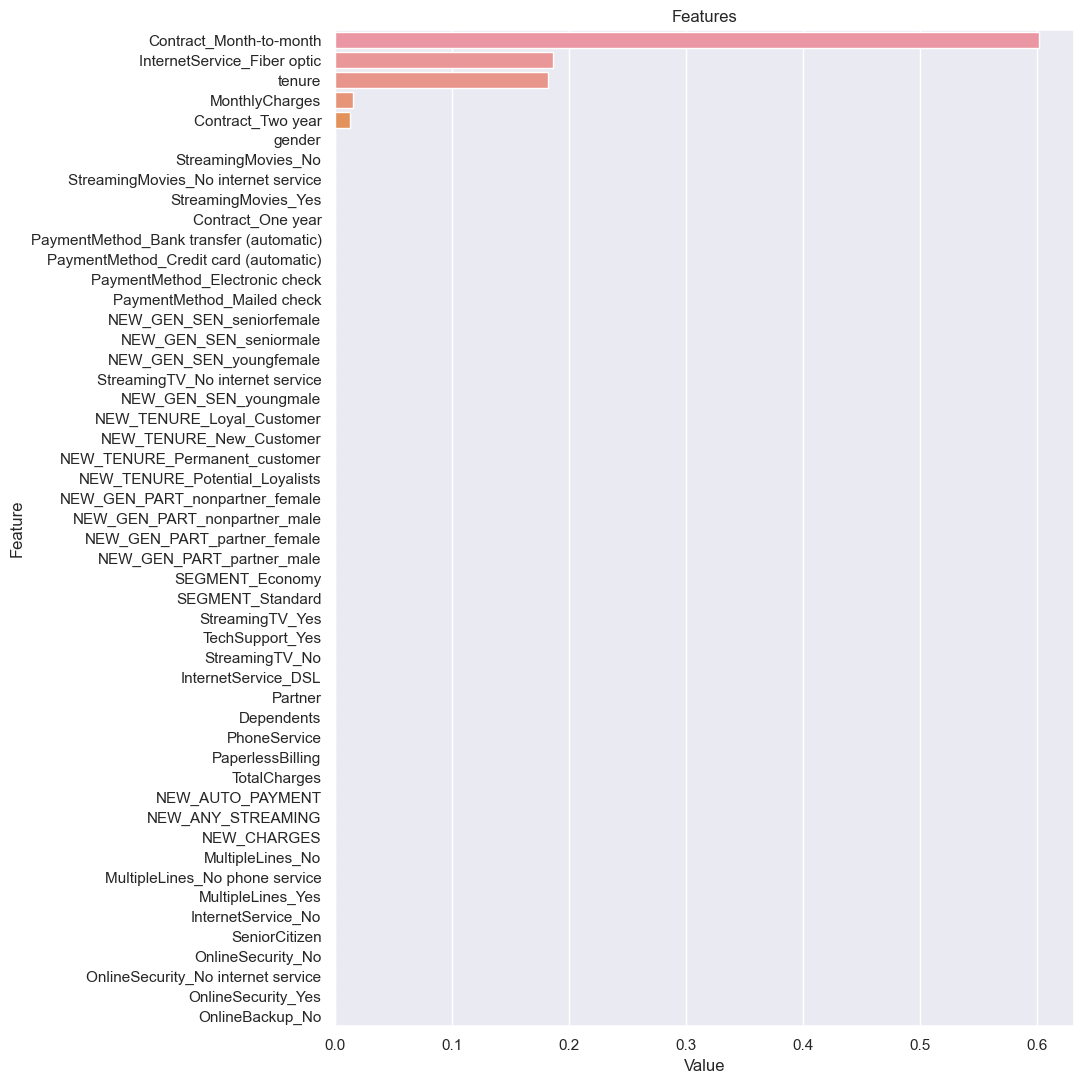

In [212]:
# Feature Importance

def plot_importance(model, features, num=50, save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(11,11))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show(block = True)
    if save:
        plt.savefig("importances.png")



plot_importance(cart_model, X_test)

In [115]:
# CATBOOST
#########################

cat_model = CatBoostClassifier(verbose=False).fit(X_train, y_train)
y_pred = cat_model.predict(X_test)

In [116]:
cat_results = {'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
                'ROC-AUC': roc_auc_score(y_test, y_pred)}

cat_results = pd.Series(cat_results)
cat_results = cat_results.rename("CatBoost")
cat_results

Accuracy     0.795600
Precision    0.657439
Recall       0.501319
F1 Score     0.568862
ROC-AUC      0.702601
Name: CatBoost, dtype: float64

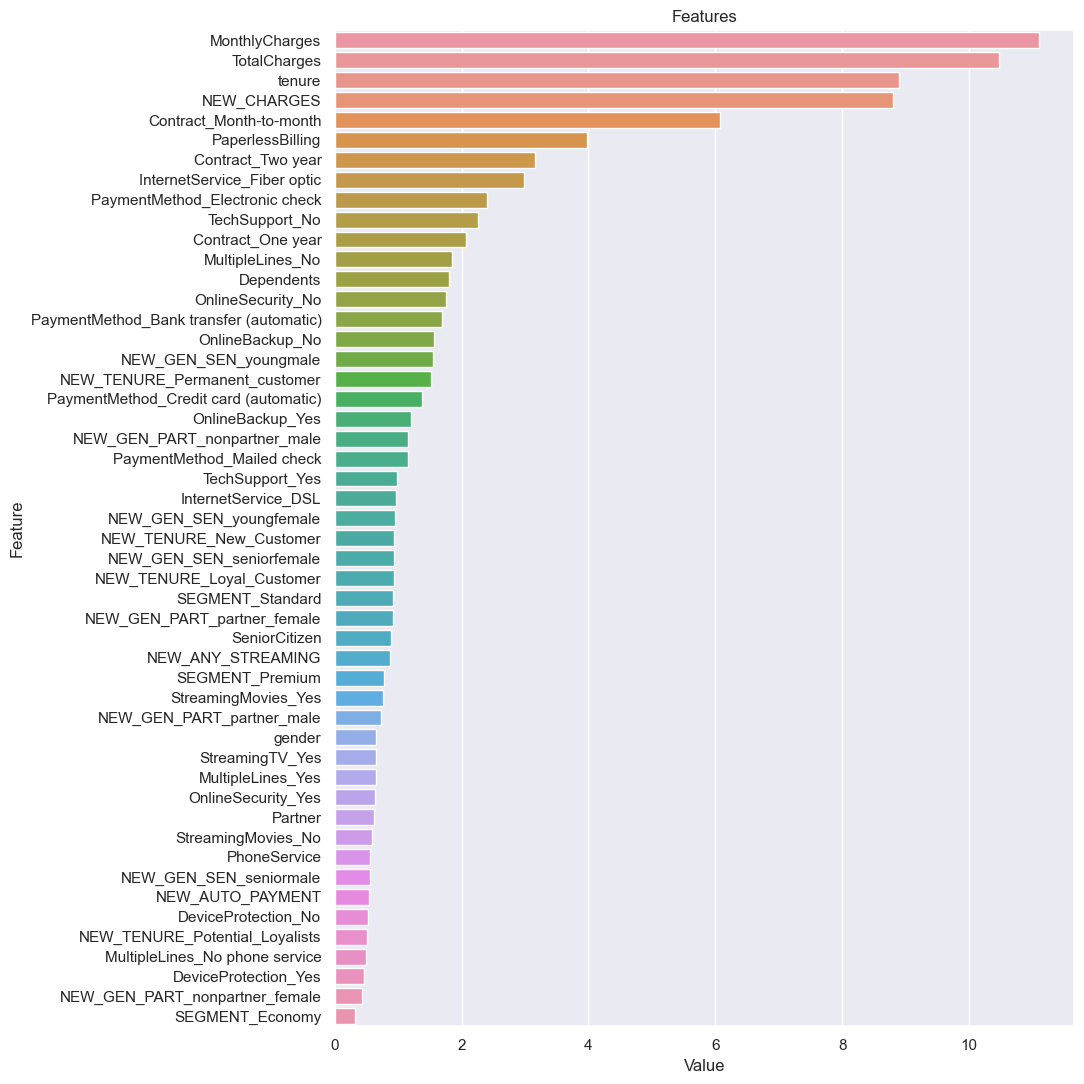

In [213]:
# Feature Importance

def plot_importance(model, features, num=50, save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(11,11))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show(block = True)
    if save:
        plt.savefig("importances.png")



plot_importance(cat_model, X_test)

In [117]:
# Initial scores by Test set
beginning_results = pd.concat([rf_results, log_results,knn_results, lgbm_results, cart_results, cat_results],axis=1).T
beginning_results

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Random Forest,0.782825,0.629893,0.467018,0.536364,0.683024
Logistic Regression,0.806246,0.681507,0.525066,0.593145,0.717387
KNeighbors Classifier,0.760114,0.560831,0.498681,0.527933,0.677496
LightGBM,0.791341,0.638436,0.517150,0.571429,0.704692
CART,0.729595,0.497462,0.517150,0.507115,0.662459
CatBoost,0.795600,0.657439,0.501319,0.568862,0.702601


In [157]:
# Base model results for Train set

models = [#('KNN',  KNeighborsClassifier()),
          #('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('CART', DecisionTreeClassifier()),
          ('RF',   RandomForestClassifier()),
          ("LightGBM", LGBMClassifier(verbose=-1)),
          ('CatBoost', CatBoostClassifier(verbose=False))]

In [158]:
for name, classifier in models:
    scores = cross_validate(classifier, X_train.values, y_train, cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], verbose=False)

    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    roc_auc = np.mean(scores['test_roc_auc'])

    print(f"{name}:")
    print(f"  Accuracy: {round(accuracy, 3)}")
    print(f"  Precision: {round(precision, 3)}")
    print(f"  Recall: {round(recall, 3)}")
    print(f"  F1: {round(f1, 3)}")
    print(f"  ROC AUC: {round(roc_auc, 3)}")
    print()

KNN:
  Accuracy: 0.766
  Precision: 0.56
  Recall: 0.543
  F1: 0.551
  ROC AUC: 0.779

Logistic Regression:
  Accuracy: 0.808
  Precision: 0.676
  Recall: 0.528
  F1: 0.592
  ROC AUC: 0.851

CART:
  Accuracy: 0.731
  Precision: 0.493
  Recall: 0.501
  F1: 0.497
  ROC AUC: 0.658

RF:
  Accuracy: 0.786
  Precision: 0.621
  Recall: 0.489
  F1: 0.546
  ROC AUC: 0.824

LightGBM:
  Accuracy: 0.791
  Precision: 0.624
  Recall: 0.53
  F1: 0.572
  ROC AUC: 0.836

CatBoost:
  Accuracy: 0.797
  Precision: 0.645
  Recall: 0.519
  F1: 0.575
  ROC AUC: 0.843



In [155]:
def plot_importance(model, features, num=15, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')       

ROC_AUC: 0.6518 (CART)


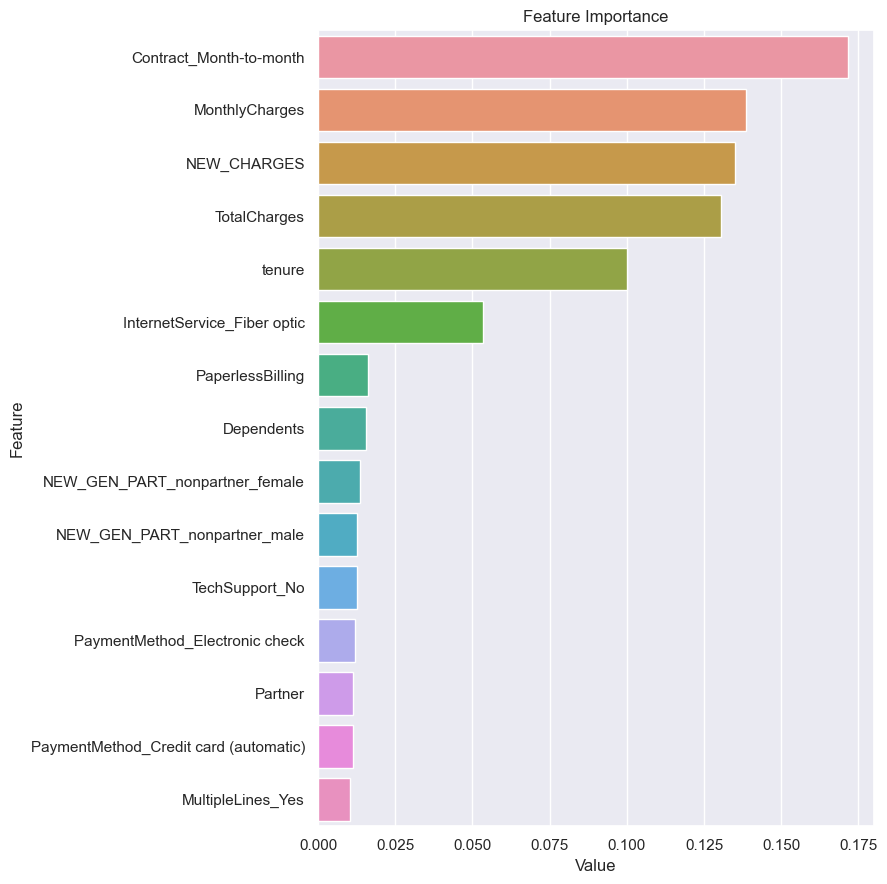

ROC_AUC: 0.8221 (RF)


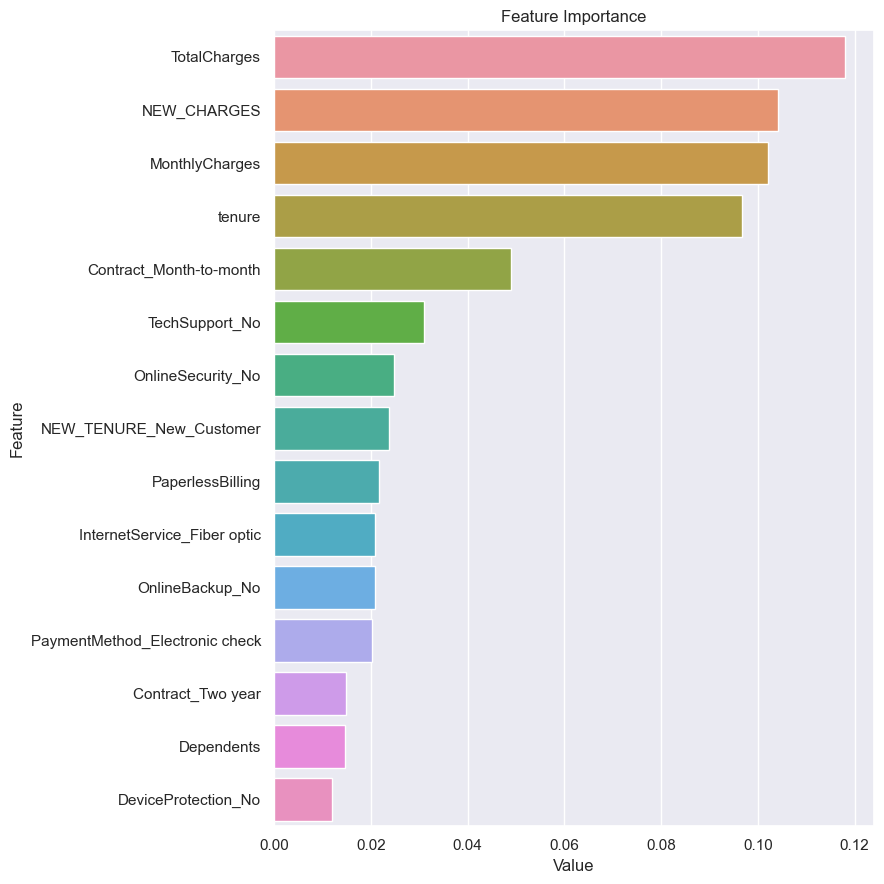

ROC_AUC: 0.8357 (LightGBM)


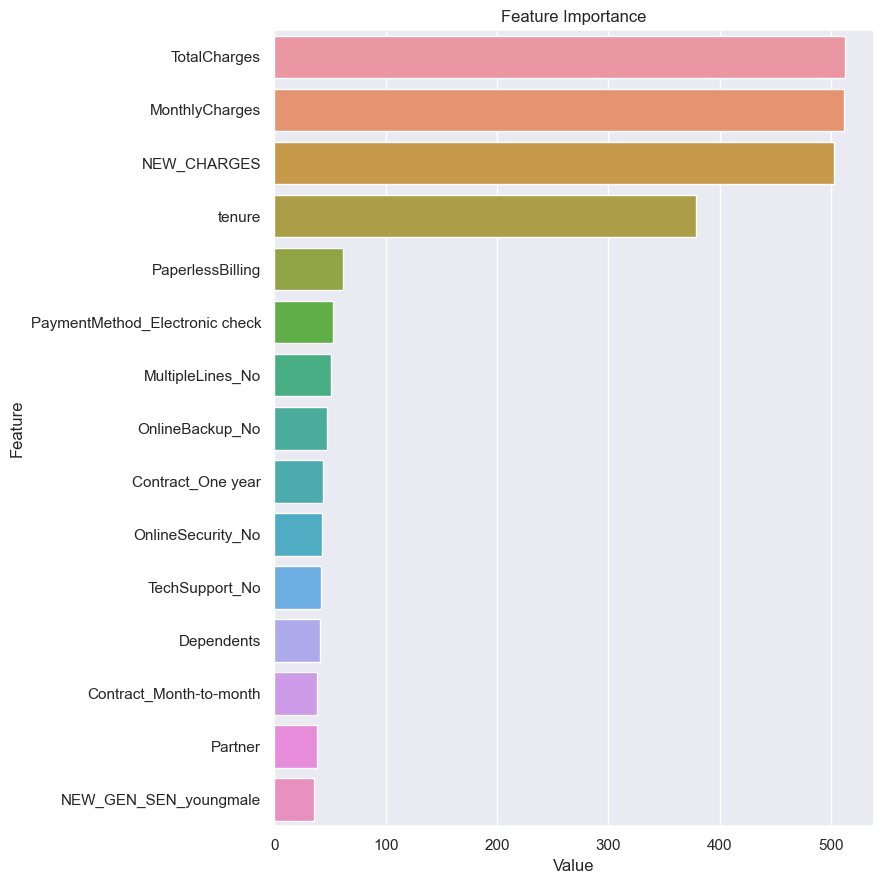

ROC_AUC: 0.8435 (CatBoost)


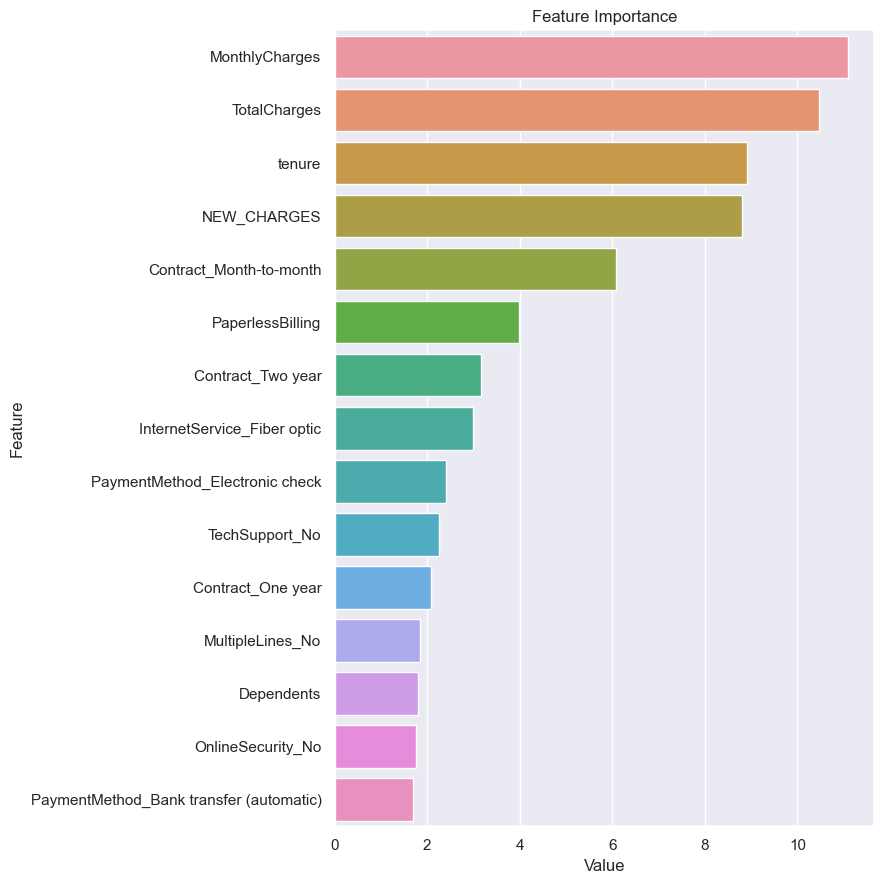

In [156]:
for name, classifier in models:
    model = classifier.fit(X_train, y_train)
    roc_auc = np.mean(cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc'))
    print(f"ROC_AUC: {round(roc_auc, 4)} ({name})")

     # Show feature importance ratin
    plot_importance(model, X_train, save=False)

##### 4.3.1 Hyperparameter Optimization

In [214]:
# Random Forest
##################

rf_model.get_params()

rf_params = {'n_estimators': [50, 100, 150],
             'max_depth': [None, 10, 20],
             'min_samples_split': [2, 4, 6, 8],
             'max_features': [3,5,7]}

rf_grid = GridSearchCV(rf_model, rf_params,cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

rf_grid.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 10,
 'max_features': 7,
 'min_samples_split': 8,
 'n_estimators': 100}

In [215]:
rf_final = rf_model.set_params(**rf_grid.best_params_, random_state = 17).fit(X_train,y_train)

rf_cv_result = pd.DataFrame(cross_validate(rf_final,X_test, y_test, cv=5, scoring=["accuracy", "f1","roc_auc"])).iloc[:, 2:].mean()

rf_cv_result.index = ['Accuracy', 'F1 Score', 'roc_auc']
rf_cv_result = rf_cv_result.rename("Random Forest")
rf_cv_result

Accuracy    0.794882
F1 Score    0.534613
roc_auc     0.825245
Name: Random Forest, dtype: float64

In [125]:
# KNN
##################

knn_params = {'n_neighbors': range(2, 11),
              'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn_model, knn_params,cv=5, n_jobs=-1, verbose=1).fit(X_train.values, y_train.values)
knn_grid.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'n_neighbors': 10, 'weights': 'uniform'}

In [126]:
knn_final = knn_model.set_params(**knn_grid.best_params_).fit(X_train, y_train)
knn_cv_result = pd.DataFrame(cross_validate(knn_final,X_test, y_test, cv=5, scoring=["accuracy", "f1","roc_auc"])).iloc[:, 2:].mean()

knn_cv_result.index = ['Accuracy', 'F1 Score', 'roc_auc']
knn_cv_result = knn_cv_result.rename('KNN')

knn_cv_result

Accuracy    0.784228
F1 Score    0.520267
roc_auc     0.799733
Name: KNN, dtype: float64

In [216]:
# LGBM
##################

lgbm_model.get_params()

lgbm_params = {'n_estimators': [50, 100, 150],
               'max_depth': [None, 10, 20],
               'learning_rate': [0.01, 0.1]}

lgbm_grid = GridSearchCV(lgbm_model, lgbm_params,cv=5, verbose=False,n_jobs=-1).fit(X_train,y_train)

lgbm_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}

In [217]:
lgbm_final = lgbm_model.set_params(**lgbm_grid.best_params_, random_state=17).fit(X_train,y_train)

lgbm_cv_result = pd.DataFrame(cross_validate(lgbm_final,X_test, y_test, cv=5, scoring=["accuracy", "f1","roc_auc"])).iloc[:, 2:].mean()



lgbm_cv_result.index = ['Accuracy', 'F1 Score', 'roc_auc']
lgbm_cv_result = lgbm_cv_result.rename('LightGBM')

lgbm_cv_result

Accuracy    0.778567
F1 Score    0.543123
roc_auc     0.805177
Name: LightGBM, dtype: float64

In [218]:
# CART
##################

cart_model.get_params()

cart_params = {"max_depth": range(1,11),
               "min_samples_split" : range(2,20)}

cart_grid= GridSearchCV(cart_model, cart_params,cv=5, verbose=False, n_jobs=-1).fit(X_train,y_train)
cart_grid.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [219]:
cart_final = cart_model.set_params(**cart_grid.best_params_, random_state=17).fit(X_train,y_train)

cart_cv_result = pd.DataFrame(cross_validate(cart_final,X_test, y_test, cv=5, scoring=["accuracy", "f1","roc_auc"])).iloc[:, 2:].mean()

cart_cv_result.index = ['Accuracy', 'F1 Score', 'roc_auc']
cart_cv_result = cart_cv_result.rename('CART')

cart_cv_result

Accuracy    0.770753
F1 Score    0.494692
roc_auc     0.776383
Name: CART, dtype: float64

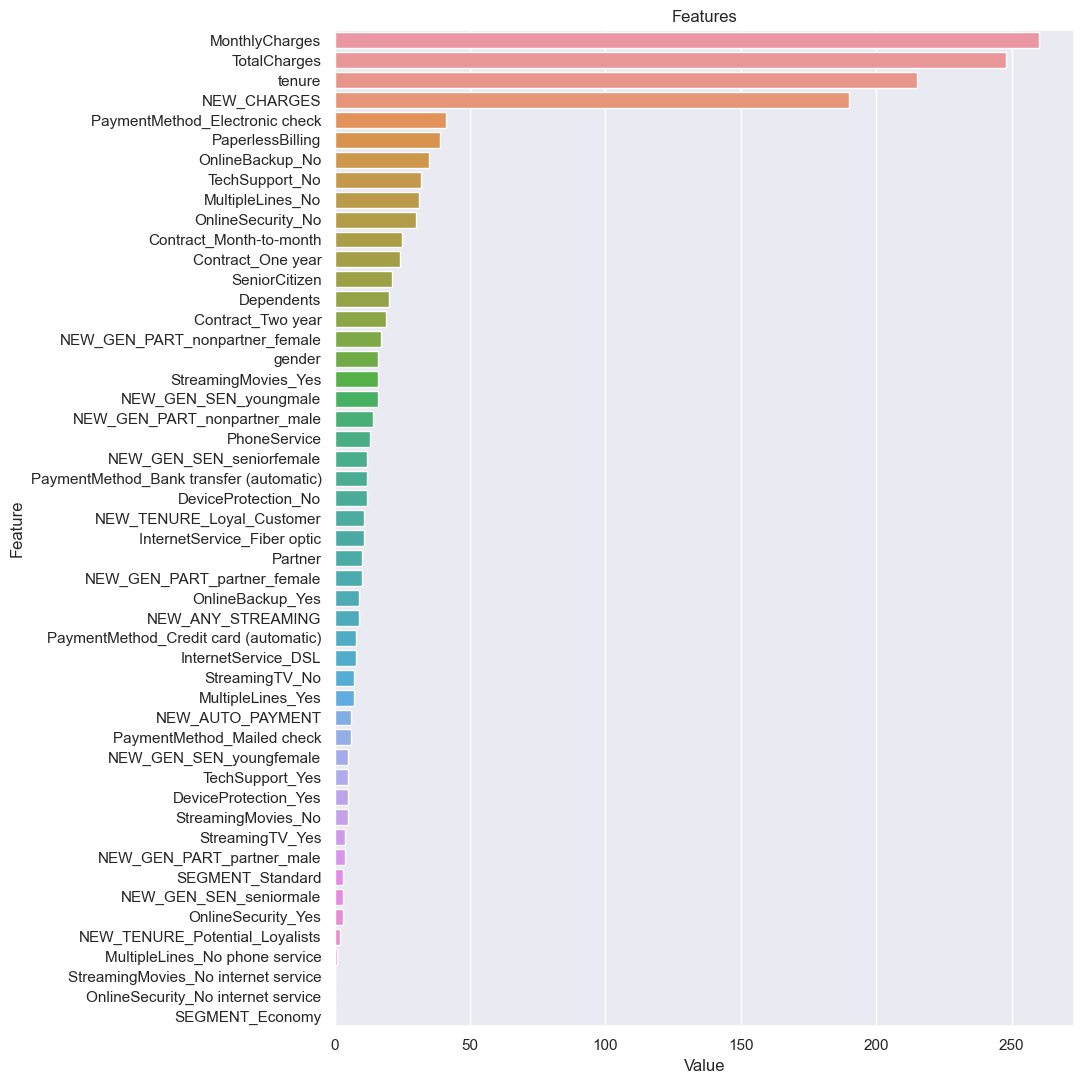

In [220]:
# Feature Importance - LightGBM
###############################

def plot_importance(model, features, num=50, save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(11,11))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show(block = True)
    if save:
        plt.savefig("importances.png")



plot_importance(lgbm_final, X_test)

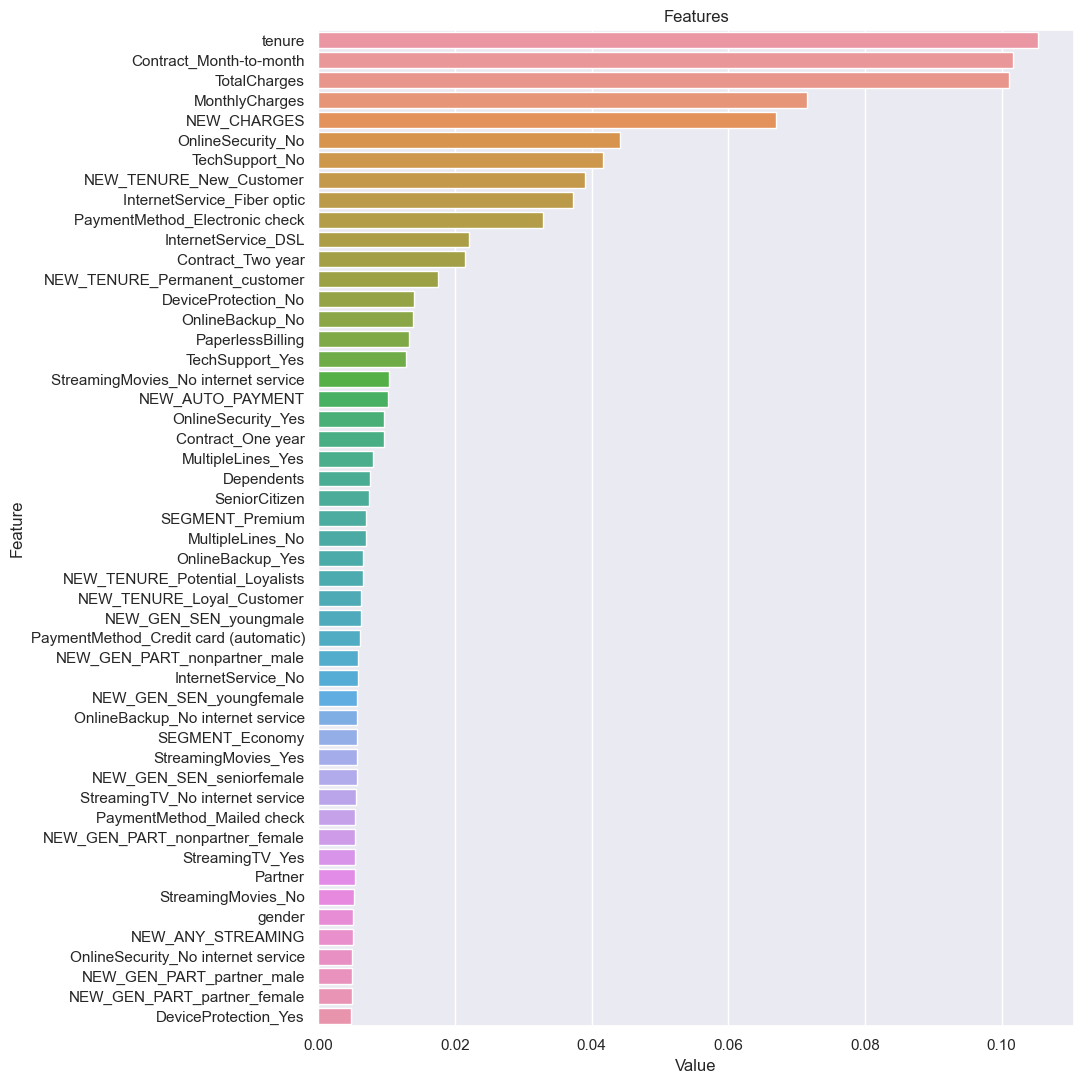

In [221]:
# Feature Importance - Random Forest
###############################

def plot_importance(model, features, num=50, save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(11,11))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show(block = True)
    if save:
        plt.savefig("importances.png")



plot_importance(rf_final, X_test)

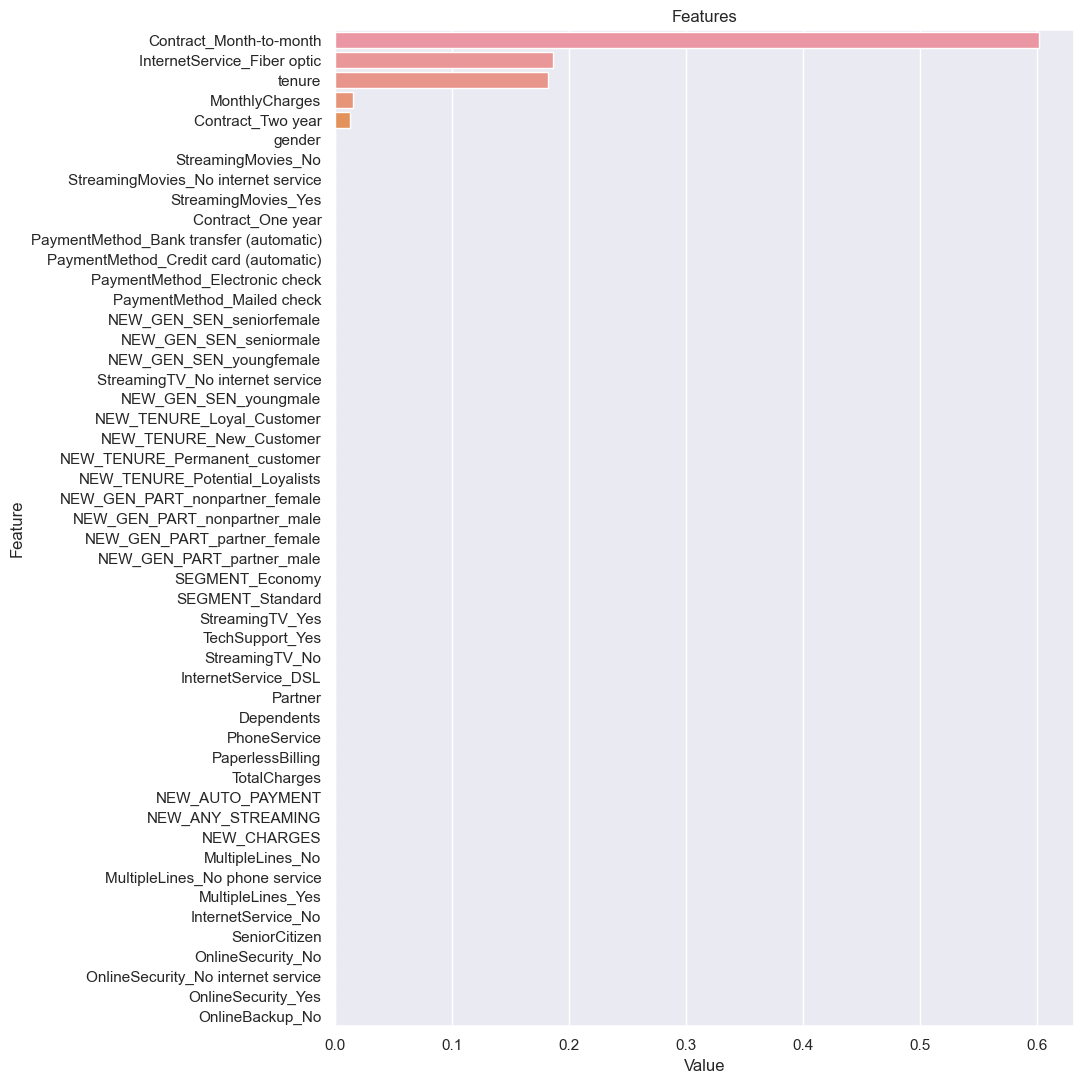

In [222]:
# Feature Importance - CART
###############################

def plot_importance(model, features, num=50, save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(11,11))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show(block = True)
    if save:
        plt.savefig("importances.png")



plot_importance(cart_final, X_test)

In [120]:
# Bulk display of results for the test set at the end of the optimization process
final_results = pd.concat(
    [rf_cv_result, knn_cv_result, lgbm_cv_result, cart_cv_result],
    axis=1).T

round(final_results * 100, 2)

,Accuracy,F1 Score,roc_auc
Random Forest,79.63,53.94,81.79
KNN,78.42,52.03,79.97
LightGBM,77.86,54.31,80.52
CART,77.08,49.47,77.64
